In [15]:
# Project 2: Dataset Merging, Data Manipulation, K-Means Clustering
!wget https://raw.githubusercontent.com/PulockDas/pd-12-resources/refs/heads/master/titanic.csv


--2025-02-05 17:25:15--  https://raw.githubusercontent.com/PulockDas/pd-12-resources/refs/heads/master/titanic.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 60302 (59K) [text/plain]
Saving to: ‘titanic.csv’

titanic.csv         100%[===================>]  58.89K  --.-KB/s    in 0.02s   

2025-02-05 17:25:15 (2.73 MB/s) - ‘titanic.csv’ saved [60302/60302]



In [16]:
#Q1 1. Create a CSV file with the name, ‘term-test-1-result.csv’
import pandas as pd
import random

# Generating data for 50 students
data = {
    "Registration Number": [f"R{1001 + i}" for i in range(50)],
    "Name": [f"Student {i+1}" for i in range(50)],
    "TT-1 Marks": [random.randint(30, 100) for _ in range(50)]  # Marks between 30 and 100
}

# Creating the DataFrame
df = pd.DataFrame(data)

# Saving it to a CSV file
df.to_csv('term-test-1-result.csv', index=False)


In [ ]:
from google.colab import files
files.download('term-test-1-result.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [17]:
import pandas as pd
import random

# Generating data for 50 students
data = {
    "Registration Number": [f"R{1001 + i}" for i in range(50)],
    "Name": [f"Student {i+1}" for i in range(50)],
    "TT-1 Marks": [random.randint(30, 100) for _ in range(50)]  # Marks between 30 and 100 for TT-1
}

# Creating the DataFrame for TT-1
df_tt1 = pd.DataFrame(data)

# For TT-2, keeping the same Registration Number and Name, but changing marks
df_tt2 = df_tt1.copy()  # Copying TT-1 data
df_tt2['TT-2 Marks'] = [random.randint(0, 20) for _ in range(50)]  # Marks between 0 and 20 for TT-2

# Saving the TT-2 result CSV file
df_tt2[['Registration Number', 'Name', 'TT-2 Marks']].to_csv('term-test-2-result.csv', index=False)


In [18]:
#Q3 Load both the files in different pandas dataframes.

import pandas as pd

# Load both the term-test-1 and term-test-2 result files into separate dataframes
df_tt1 = pd.read_csv('term-test-1-result.csv')
df_tt2 = pd.read_csv('term-test-2-result.csv')

# Merging the two dataframes based on 'Registration Number'
merged_df = pd.merge(df_tt1, df_tt2, on='Registration Number')

# Displaying the merged dataframe
print(merged_df)


   Registration Number      Name_x  TT-1 Marks      Name_y  TT-2 Marks
0                R1001   Student 1          90   Student 1          17
1                R1002   Student 2          72   Student 2          18
2                R1003   Student 3          38   Student 3           1
3                R1004   Student 4          91   Student 4          10
4                R1005   Student 5          43   Student 5          15
5                R1006   Student 6          72   Student 6           5
6                R1007   Student 7          53   Student 7          20
7                R1008   Student 8          72   Student 8          13
8                R1009   Student 9          69   Student 9          15
9                R1010  Student 10          36  Student 10          11
10               R1011  Student 11          80  Student 11          12
11               R1012  Student 12          96  Student 12          20
12               R1013  Student 13          86  Student 13          18
13    

In [19]:
#Q4 Make a new column with the best term test marks for each student.
#Make a new column with the average term test marks for each student
import pandas as pd

# Load both the term-test-1 and term-test-2 result files into separate dataframes
df_tt1 = pd.read_csv('term-test-1-result.csv')
df_tt2 = pd.read_csv('term-test-2-result.csv')

# Merging the two dataframes based on 'Registration Number'
merged_df = pd.merge(df_tt1, df_tt2, on='Registration Number')

# Creating a new column for the best term test marks for each student
merged_df['Best TT Marks'] = merged_df[['TT-1 Marks', 'TT-2 Marks']].max(axis=1)

# Creating a new column for the average term test marks for each student
merged_df['Average TT Marks'] = merged_df[['TT-1 Marks', 'TT-2 Marks']].mean(axis=1)

# Displaying the updated dataframe
print(merged_df)


   Registration Number      Name_x  TT-1 Marks      Name_y  TT-2 Marks  \
0                R1001   Student 1          90   Student 1          17   
1                R1002   Student 2          72   Student 2          18   
2                R1003   Student 3          38   Student 3           1   
3                R1004   Student 4          91   Student 4          10   
4                R1005   Student 5          43   Student 5          15   
5                R1006   Student 6          72   Student 6           5   
6                R1007   Student 7          53   Student 7          20   
7                R1008   Student 8          72   Student 8          13   
8                R1009   Student 9          69   Student 9          15   
9                R1010  Student 10          36  Student 10          11   
10               R1011  Student 11          80  Student 11          12   
11               R1012  Student 12          96  Student 12          20   
12               R1013  Student 13    

In [20]:
#Q5 Drop both the columns named ‘TT-1 Marks’ and ‘TT-2 Marks’
import pandas as pd

# Load both the term-test-1 and term-test-2 result files into separate dataframes
df_tt1 = pd.read_csv('term-test-1-result.csv')
df_tt2 = pd.read_csv('term-test-2-result.csv')

# Merging the two dataframes based on 'Registration Number'
merged_df = pd.merge(df_tt1, df_tt2, on='Registration Number')

# Creating a new column for the best term test marks for each student
merged_df['Best TT Marks'] = merged_df[['TT-1 Marks', 'TT-2 Marks']].max(axis=1)

# Dropping the 'TT-1 Marks' and 'TT-2 Marks' columns
merged_df = merged_df.drop(columns=['TT-1 Marks', 'TT-2 Marks'])

# Displaying the updated dataframe
print(merged_df)


   Registration Number      Name_x      Name_y  Best TT Marks
0                R1001   Student 1   Student 1             90
1                R1002   Student 2   Student 2             72
2                R1003   Student 3   Student 3             38
3                R1004   Student 4   Student 4             91
4                R1005   Student 5   Student 5             43
5                R1006   Student 6   Student 6             72
6                R1007   Student 7   Student 7             53
7                R1008   Student 8   Student 8             72
8                R1009   Student 9   Student 9             69
9                R1010  Student 10  Student 10             36
10               R1011  Student 11  Student 11             80
11               R1012  Student 12  Student 12             96
12               R1013  Student 13  Student 13             86
13               R1014  Student 14  Student 14             66
14               R1015  Student 15  Student 15             41
15      

In [21]:
#Q6 make a CSV file which will have the attendance and term final marks of every student
import pandas as pd
import random

# Load the merged dataframe with best term test marks
df_tt1 = pd.read_csv('term-test-1-result.csv')
df_tt2 = pd.read_csv('term-test-2-result.csv')

merged_df = pd.merge(df_tt1, df_tt2, on='Registration Number')
merged_df['Best TT Marks'] = merged_df[['TT-1 Marks', 'TT-2 Marks']].max(axis=1)
merged_df = merged_df.drop(columns=['TT-1 Marks', 'TT-2 Marks'])

# Generating random attendance marks (0 to 10) and term final marks (0 to 100)
merged_df['Attendance'] = [random.randint(0, 10) for _ in range(50)]
merged_df['Term Final Marks'] = [random.randint(0, 100) for _ in range(50)]

# Saving the new dataframe to a CSV file
merged_df.to_csv('attendance-term-final-marks.csv', index=False)

# Display the saved dataframe
print(merged_df)


   Registration Number      Name_x      Name_y  Best TT Marks  Attendance  \
0                R1001   Student 1   Student 1             90           4   
1                R1002   Student 2   Student 2             72           5   
2                R1003   Student 3   Student 3             38           7   
3                R1004   Student 4   Student 4             91           1   
4                R1005   Student 5   Student 5             43           9   
5                R1006   Student 6   Student 6             72           3   
6                R1007   Student 7   Student 7             53          10   
7                R1008   Student 8   Student 8             72           6   
8                R1009   Student 9   Student 9             69           5   
9                R1010  Student 10  Student 10             36           6   
10               R1011  Student 11  Student 11             80           5   
11               R1012  Student 12  Student 12             96           8   

In [22]:
import pandas as pd

# Load the latest term test dataframe (already created earlier)
df_tt1 = pd.read_csv('term-test-1-result.csv')
df_tt2 = pd.read_csv('term-test-2-result.csv')

merged_df = pd.merge(df_tt1, df_tt2, on='Registration Number')
merged_df['Best TT Marks'] = merged_df[['TT-1 Marks', 'TT-2 Marks']].max(axis=1)
merged_df = merged_df.drop(columns=['TT-1 Marks', 'TT-2 Marks'])

# Load the 'attendance-term-final-marks.csv' file
attendance_df = pd.read_csv('attendance-term-final-marks.csv')

# Merge the attendance dataframe with the term test dataframe based on 'Registration Number'
final_merged_df = pd.merge(merged_df, attendance_df, on='Registration Number')

# Display the merged dataframe
print(final_merged_df)


   Registration Number    Name_x_x    Name_y_x  Best TT Marks_x    Name_x_y  \
0                R1001   Student 1   Student 1               90   Student 1   
1                R1002   Student 2   Student 2               72   Student 2   
2                R1003   Student 3   Student 3               38   Student 3   
3                R1004   Student 4   Student 4               91   Student 4   
4                R1005   Student 5   Student 5               43   Student 5   
5                R1006   Student 6   Student 6               72   Student 6   
6                R1007   Student 7   Student 7               53   Student 7   
7                R1008   Student 8   Student 8               72   Student 8   
8                R1009   Student 9   Student 9               69   Student 9   
9                R1010  Student 10  Student 10               36  Student 10   
10               R1011  Student 11  Student 11               80  Student 11   
11               R1012  Student 12  Student 12      

In [23]:
import pandas as pd

# Load the latest term test dataframe (already created earlier)
df_tt1 = pd.read_csv('term-test-1-result.csv')
df_tt2 = pd.read_csv('term-test-2-result.csv')

# Merge the term test dataframes based on 'Registration Number'
merged_df = pd.merge(df_tt1, df_tt2, on='Registration Number')

# Create a new column for the best term test marks for each student
merged_df['Best TT Marks'] = merged_df[['TT-1 Marks', 'TT-2 Marks']].max(axis=1)

# Create a new column for the average term test marks before dropping 'TT-1 Marks' and 'TT-2 Marks'
merged_df['Average TT Marks'] = merged_df[['TT-1 Marks', 'TT-2 Marks']].mean(axis=1)

# Drop the 'TT-1 Marks' and 'TT-2 Marks' columns
merged_df = merged_df.drop(columns=['TT-1 Marks', 'TT-2 Marks'])

# Load the 'attendance-term-final-marks.csv' file
attendance_df = pd.read_csv('attendance-term-final-marks.csv')

# Merge the attendance dataframe with the term test dataframe based on 'Registration Number'
final_merged_df = pd.merge(merged_df, attendance_df, on='Registration Number')

# Calculate the 'Final Marks' column
final_merged_df['Final Marks'] = (final_merged_df['Term Final Marks'] * 0.7) + final_merged_df['Average TT Marks'] + final_merged_df['Attendance']

# Display the final merged dataframe
print(final_merged_df)


   Registration Number    Name_x_x    Name_y_x  Best TT Marks_x  \
0                R1001   Student 1   Student 1               90   
1                R1002   Student 2   Student 2               72   
2                R1003   Student 3   Student 3               38   
3                R1004   Student 4   Student 4               91   
4                R1005   Student 5   Student 5               43   
5                R1006   Student 6   Student 6               72   
6                R1007   Student 7   Student 7               53   
7                R1008   Student 8   Student 8               72   
8                R1009   Student 9   Student 9               69   
9                R1010  Student 10  Student 10               36   
10               R1011  Student 11  Student 11               80   
11               R1012  Student 12  Student 12               96   
12               R1013  Student 13  Student 13               86   
13               R1014  Student 14  Student 14               6

In [24]:
#Q7 7. Write the content of the latest pandas dataframe to a new CSV file named ‘final result.csv’.
# Writing the content of the latest dataframe to a new CSV file
final_merged_df.to_csv('final result.csv', index=False)


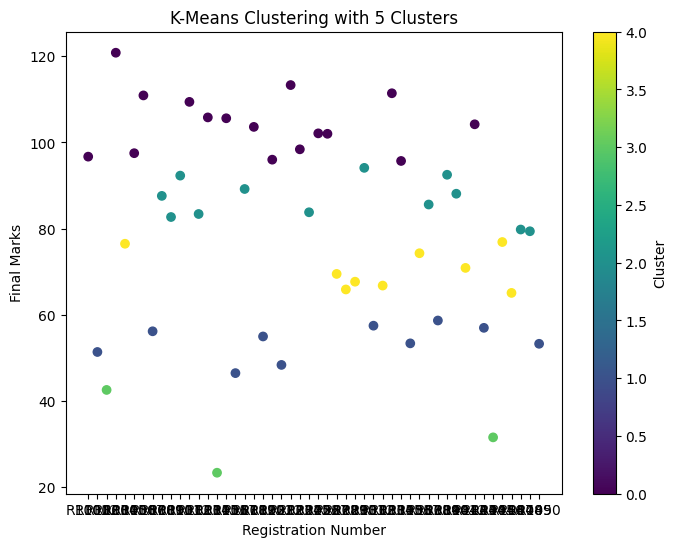

In [25]:
#Q8 Cluster the final marks of each student using K-Means clustering algorithm.
import pandas as pd
import random
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Assuming final_merged_df is the dataframe with 'Final Marks' and other columns
# If not, load or prepare the dataframe as needed

# Extract 'Final Marks' as the feature for clustering

final_marks = final_merged_df[['Final Marks']]

# Randomly choose a number of clusters between 1 and 6
k = random.randint(2, 6)  # You can change this manually as well

# Apply K-Means clustering
kmeans = KMeans(n_clusters=k, random_state=42)
final_merged_df['Cluster'] = kmeans.fit_predict(final_marks)

# Visualizing the clusters
plt.figure(figsize=(8, 6))
plt.scatter(final_merged_df['Registration Number'], final_merged_df['Final Marks'], c=final_merged_df['Cluster'], cmap='viridis')
plt.xlabel('Registration Number')
plt.ylabel('Final Marks')
plt.title(f'K-Means Clustering with {k} Clusters')
plt.colorbar(label='Cluster')
plt.show()
